Running R in Jupyter notebook
To run R commands in a Jupyter notebook, you need to install the R kernel for Jupyter. From the terminal (not RStudio or R GUI), launch R (type R and press return), then run the following commands:
```
install.packages('devtools')
devtools::install_github('IRkernel/IRkernel')
# If using R 3.5, run
IRkernel::installspec(name = 'ir35', displayname = 'R 3.5')
# otherwise, change 3.5 to the version of R that is installed on your computer
```

In [1]:
# Check that R works
x = 2
x + 3 - 4

[1] 1

Install the required packages. Run the following commands in R
```
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("rtracklayer", version = "3.8")
BiocManager::install("ChIPpeakAnno", version = "3.8")
```

In [2]:
# Load the peaks in R
suppressMessages(library(rtracklayer))

Gcn4_motifs <- import("data/Gcn4_motifs_Rawal_et_al.bed" , format = "BED")
ChIPseq_peaks <- import("data/Gcn4_ChIP_Rawal_et_al.bed" , format = "BED")
peaks1 <- import("data/Gcn4_SELEX_1.bed" , format = "BED")
peaks2 <- import("data/Gcn4_SELEX_2.bed" , format = "BED")
peaks3 <- import("data/Gcn4_SELEX_3.bed" , format = "BED")

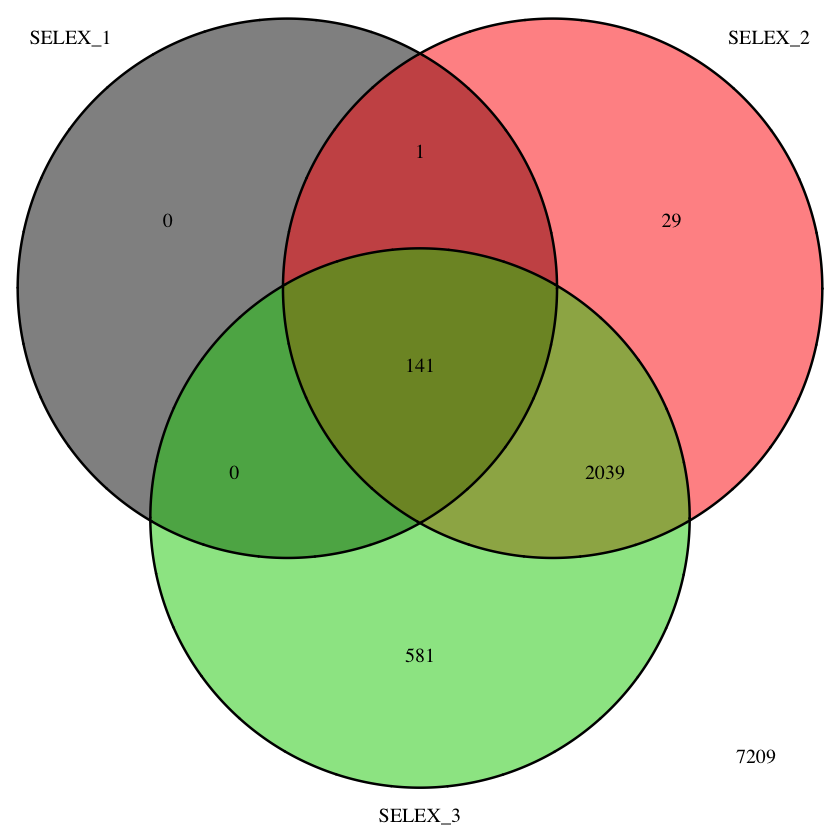

In [3]:
# Make some Venn diagrams
suppressMessages(library(ChIPpeakAnno))

V <- makeVennDiagram(list(peaks1, peaks2, peaks3), NameOfPeaks=c("SELEX_1", "SELEX_2", "SELEX_3"),
                totalTest=10000, scaled=FALSE, euler.d=FALSE, fill=c(1,2,3))

If you want to save the figure as a PDF file run the following commands:

In [4]:
# Create a folder for the figures
if (!dir.exists("figures")){
    dir.create("figures")
}

# Generate a PDF figure
pdf("figures/Venn_3_SELEX_rounds.pdf")
V <- makeVennDiagram(list(peaks1, peaks2, peaks3), NameOfPeaks=c("SELEX_1", "SELEX_2", "SELEX_3"),
                totalTest=10000, scaled=FALSE, euler.d=FALSE, fill=c(1,2,3))
dev.off()

pdf 
  2

In [5]:
# Compute the overlaps between the sites called in round 1 and the peaks from ChIP-seq experiments, 
# and the previously identified motifs
pdf("figures/Venn_SELEX_round_1.pdf")
V <- makeVennDiagram(list(Gcn4_motifs, ChIPseq_peaks, peaks1), 
                NameOfPeaks=c("Gcn4_motifs", "Gcn4_peaks_ChIPseq", "SELEX_1"), 
                totalTest=10000, scaled=FALSE, euler.d=FALSE, fill=c(1,2,3))
dev.off()

pdf 
  2

In [6]:
# Compute the overlaps between the sites called in round 2 and the peaks from ChIP-seq experiments, 
# and the previously identified motifs
pdf("figures/Venn_SELEX_round_2.pdf")
V <- makeVennDiagram(list(Gcn4_motifs, ChIPseq_peaks, peaks2), 
                NameOfPeaks=c("Gcn4_motifs", "Gcn4_peaks_ChIPseq", "SELEX_2"), 
                totalTest=10000, scaled=FALSE, euler.d=FALSE, fill=c(1,2,3))
dev.off()

pdf 
  2

In [7]:
# Compute the overlaps between the sites called in round 3 and the peaks from ChIP-seq experiments, 
# and the previously identified motifs
pdf("figures/Venn_SELEX_round_3.pdf")
V <- makeVennDiagram(list(Gcn4_motifs, ChIPseq_peaks, peaks3), 
                NameOfPeaks=c("Gcn4_motifs", "Gcn4_peaks_ChIPseq", "SELEX_3"), 
                totalTest=10000, scaled=FALSE, euler.d=FALSE, fill=c(1,2,3))
dev.off()

pdf 
  2